# Study the ratio of calibrated spectra
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS FRANCE
- creation date   : 18th October 2017





In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
AnaCalibratedSpectraRatio
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_08jun17/HD205905


In [5]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'figure.figsize' : (10, 5)})

### PySynphot

In [7]:
os.environ['PYSYN_CDBS']

'/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs'

In [8]:
import pysynphot as S

In [9]:
 from scipy import interpolate

In [10]:
import datetime
from datetime import timedelta
from dateutil import parser  # very usefull time format smart parser

In [11]:
import matplotlib as mpl
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [12]:
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [13]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days=mdates.DayLocator()  # every day
hour=mdates.HourLocator()  # every day
yearsFmt = mdates.DateFormatter('%Y')

# Initialisation

## Steering 

In [14]:
ShowInputSpectra=False

## Input fits file

- containing the calibrated spectra

In [15]:
inputdir="./spectrum_calibspec"
MIN_IMGNUMBER=144
MAX_IMGNUMBER=357
date="20170608"
object_name='HD205905'
tag = "calibSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output directory

In [16]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./study_calibspec"
ensure_dir(outputdir)

# Open input file

In [17]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [18]:
all_dates,all_airmass,all_titles,all_header,all_expo, all_leftspectra_data,all_rightspectra_data, all_leftspectra_data_stat_err , all_rightspectra_data_stat_err ,all_leftspectra_wl,all_rightspectra_wl,all_filt,all_filt1,all_filt2=BuildCalibSpec(sorted_files,sorted_numbers,object_name)

# Airmasses

In [19]:
all_airmass=np.array(all_airmass)

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


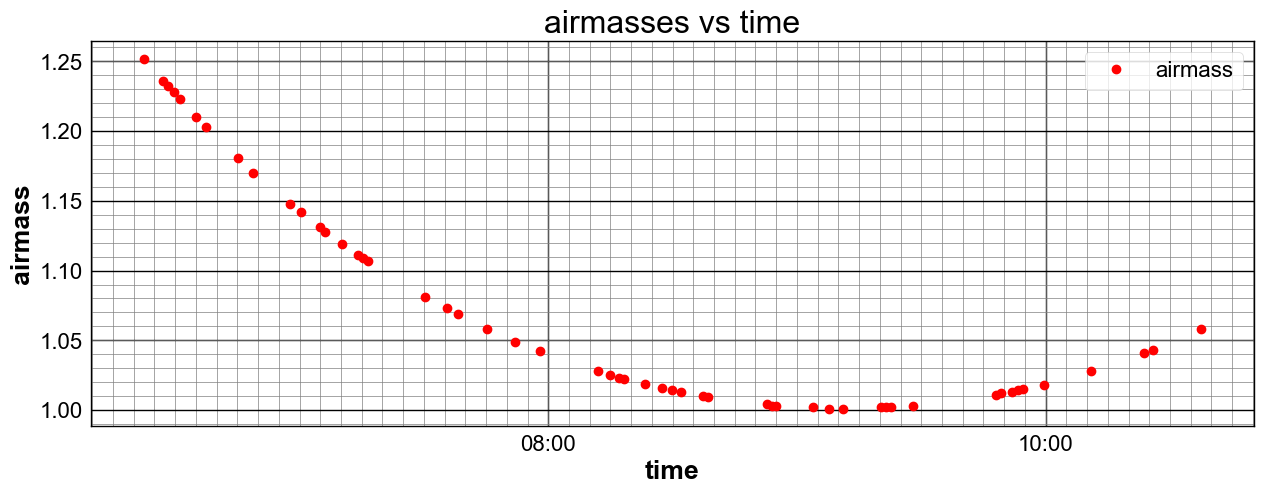

In [20]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

# Disperser Sorting

In [21]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [22]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  []
dia Thor300  	 : filt1_idx ::  [ 6  8 14 15 21 25 26 29 35 37 39 40 48 49 50 52]
dia HoloPhP  	 : filt2_idx ::  [ 1 11 16 17 30 38 41 43 44 51]
dia HoloPhAg  	 : filt3_idx ::  [ 2  3 12 20 22 27 45]
dia HoloAmAg  	 : filt4_idx ::  [ 4  7  9 13 18 23 31 32 36 42 46 47]
dia Ron200  	 : filt5_idx ::  [ 0  5 10 19 24 28 33 34]
Unknown  	 : filt6_idx ::  []


In [42]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

In [47]:
all_filt1=np.array(all_filt1)
all_filt2=np.array(all_filt2)

In [73]:
def FindIndexWithFilt(all_filt,in_index,tagfilt):
    all_filt_indisp=all_filt[in_index]
    sel_idx=np.where(all_filt_indisp==tagfilt)
    out_index=in_index[sel_idx]
    return out_index

In [74]:
all_filt1_Thor300=all_filt1[Thor300_index]
#all_filt1_Ron400=all_filt1[Ron400_index]
all_filt1_HoloPhP=all_filt1[HoloPhP_index]
all_filt1_HoloPhAg=all_filt1[HoloPhAg_index]
all_filt1_HoloAmAg=all_filt1[HoloAmAg_index]
all_filt1_Ron200=all_filt1[Ron200_index]

In [75]:
Thor300_index2=FindIndexWithFilt(all_filt1,Thor300_index,'FGB37')
HoloPhP_index2=FindIndexWithFilt(all_filt1,HoloPhP_index,'FGB37')
HoloPhAg_index2=FindIndexWithFilt(all_filt1,HoloPhAg_index,'FGB37')
HoloAmAg_index2=FindIndexWithFilt(all_filt1,HoloAmAg_index,'FGB37')
Ron200_index2=FindIndexWithFilt(all_filt1,Ron200_index,'FGB37')

# Class airmass according dispersers and find where is min for each

In [63]:
all_am_Thor300=all_airmass[Thor300_index2]
#all_am_Ron400=all_airmass[Ron400_index2]
all_am_HoloPhP=all_airmass[HoloPhP_index2]
all_am_HoloPhAg=all_airmass[HoloPhAg_index2]
all_am_HoloAmAg=all_airmass[HoloAmAg_index2]
all_am_Ron200=all_airmass[Ron200_index2]

In [64]:
min_am_Thor300_idx=np.where(all_am_Thor300==all_am_Thor300.min())[0][0]
#min_am_Ron400_idx=np.where(all_am_Ron400==all_am_Ron400.min())[0][0]
min_am_HoloPhP_idx=np.where(all_am_HoloPhP==all_am_HoloPhP.min())[0][0]
min_am_HoloPhAg_idx=np.where(all_am_HoloPhAg==all_am_HoloPhAg.min())[0][0]
min_am_HoloAmAg_idx=np.where(all_am_HoloAmAg==all_am_HoloAmAg.min())[0][0]
min_am_Ron200_idx=np.where(all_am_Ron200==all_am_Ron200.min())[0][0]

# Show Spectra

In [27]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_right.pdf','order +1')

In [28]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_leftspectra_data,all_leftspectra_data_stat_err,all_leftspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_left.pdf','order -1')

# Sort the spectra according disperser type

In [65]:
all_wl_Thor300,all_spec_Thor300=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,Thor300_index2)
#all_wl_Ron400,all_spec_Ron400=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,Ron400_index2)
all_wl_HoloPhP,all_spec_HoloPhP=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloPhP_index2)
all_wl_HoloPhAg,all_spec_HoloPhAg=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloPhAg_index2)
all_wl_HoloAmAg,all_spec_HoloAmAg=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloAmAg_index2)
all_wl_Ron200,all_spec_Ron200=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,Ron200_index2)

# Compute Ratio


- Use PySynPhot tool to compute the ratio of spectra. So it is avoided to recalculate a common binning in wl, that is ressampling in the same way wavelength because PySynphot has implemented it.

- The inverse of the spectrum of the reference at minimum airmass is taken to be the PassBand of the system and the system.

- we always cut away the first bin because Pysynphot hate wavelength zero

## Defining the references  of spectra classes

In [66]:
bp_Thor300 = S.ArrayBandpass(all_wl_Thor300[min_am_Thor300_idx][1:]*10., 1./all_spec_Thor300[min_am_Thor300_idx][1:], name='ref_Thor300')
#bp_Ron400 = S.ArrayBandpass(all_wl_Ron400[min_am_Ron400_idx][1:]*10., 1./all_spec_Ron400[min_am_Ron400_idx][1:], name='ref_Ron400')
bp_HoloPhP = S.ArrayBandpass(all_wl_HoloPhP[min_am_HoloPhP_idx][1:]*10., 1./all_spec_HoloPhP[min_am_HoloPhP_idx][1:], name='ref_HoloPhP')
bp_HoloPhAg = S.ArrayBandpass(all_wl_HoloPhAg[min_am_HoloPhAg_idx][1:]*10., 1./all_spec_HoloPhAg[min_am_HoloPhAg_idx][1:], name='ref_HoloPhAg')
bp_HoloAmAg = S.ArrayBandpass(all_wl_HoloAmAg[min_am_HoloAmAg_idx][1:]*10., 1./all_spec_HoloAmAg[min_am_HoloAmAg_idx][1:], name='ref_HoloAmAg')
bp_Ron200 = S.ArrayBandpass(all_wl_Ron200[min_am_Ron200_idx][1:]*10., 1./all_spec_Ron200[min_am_Ron200_idx][1:], name='ref_Ron200')

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  


## Compute the ratio

In [67]:
def ShowSpectrumRatio(all_wl,all_spec,pass_b,title,dir_top_img,figname,XMIN=400.,XMAX=700.,YMIN=0.7,YMAX=1.1):
    """
    """
    NBSPEC=len(all_spec)
    
    plt.figure(figsize=(10.,6.))
    for idx in np.arange(0,NBSPEC):
        
        sp = S.ArraySpectrum(all_wl[idx][1:]*10., all_spec[idx][1:], name='Reference')
        obs=sp*pass_b
        
        plt.plot(obs.wave/10.,obs.flux)
        
    plt.xlim(XMIN,XMAX)
    plt.ylim(YMIN,YMAX)
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("Ratio of spectra")
    plt.title(title)
    
    figfilename=os.path.join(dir_top_img,figname)
    plt.savefig(figfilename)
        

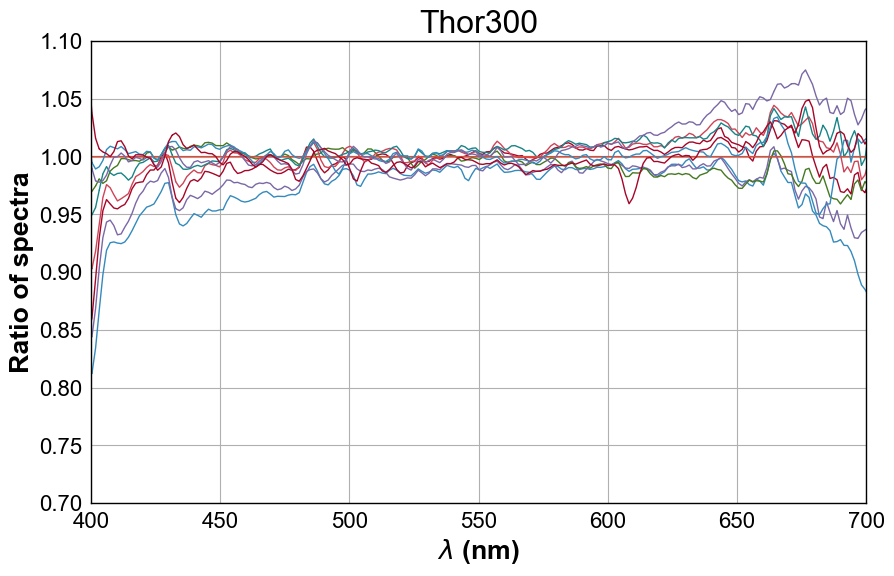

In [68]:
ShowSpectrumRatio(all_wl_Thor300,all_spec_Thor300,bp_Thor300,'Thor300',dir_top_images,'Thor300_ratio.pdf');

In [ ]:
#ShowSpectrumRatio(all_wl_Ron400,all_spec_Ron400,bp_Ron400,'Ron400',dir_top_images,'Ron400_ratio.pdf');

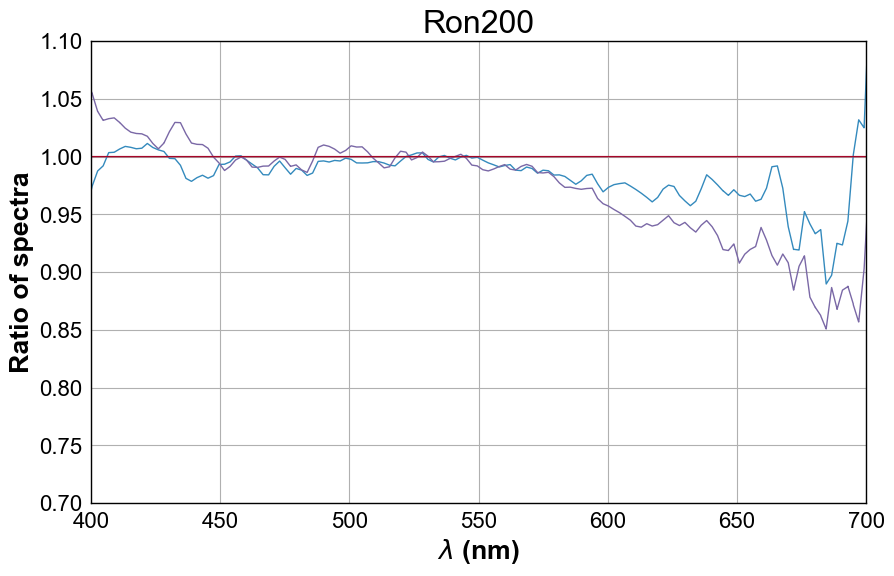

In [69]:
ShowSpectrumRatio(all_wl_Ron200,all_spec_Ron200,bp_Ron200,'Ron200',dir_top_images,'Ron200_ratio.pdf');

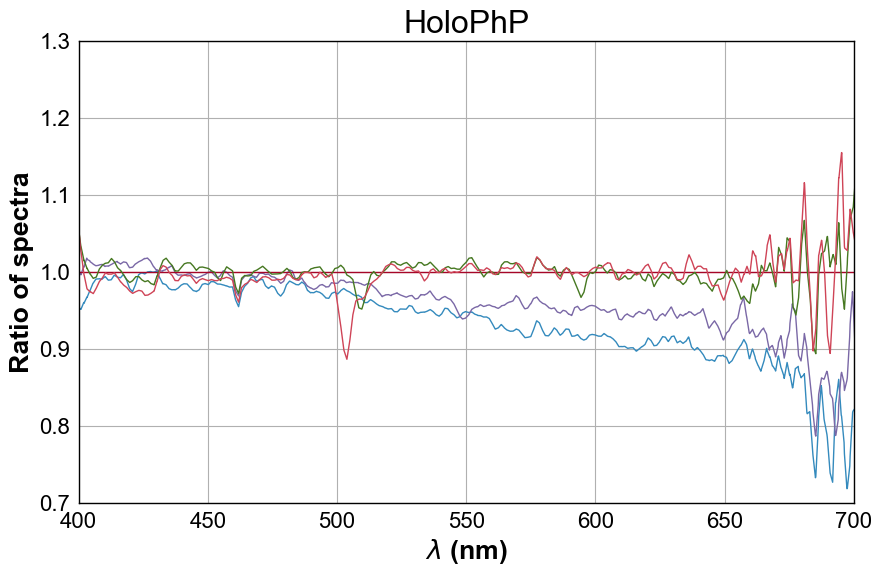

In [70]:
ShowSpectrumRatio(all_wl_HoloPhP,all_spec_HoloPhP,bp_HoloPhP,'HoloPhP',dir_top_images,'HoloPhP_ratio.pdf',YMAX=1.3);

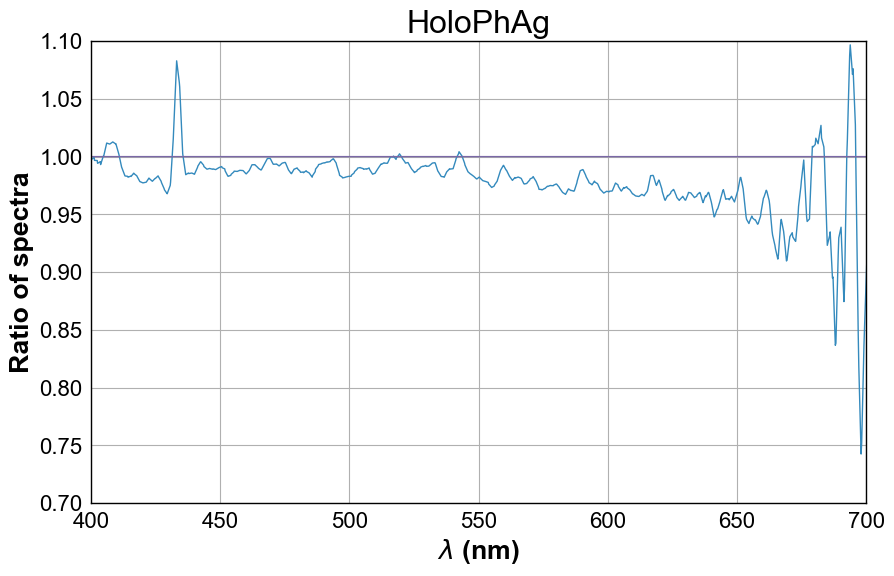

In [71]:
ShowSpectrumRatio(all_wl_HoloPhAg,all_spec_HoloPhAg,bp_HoloPhAg,'HoloPhAg',dir_top_images,'HoloPhAg_ratio.pdf');

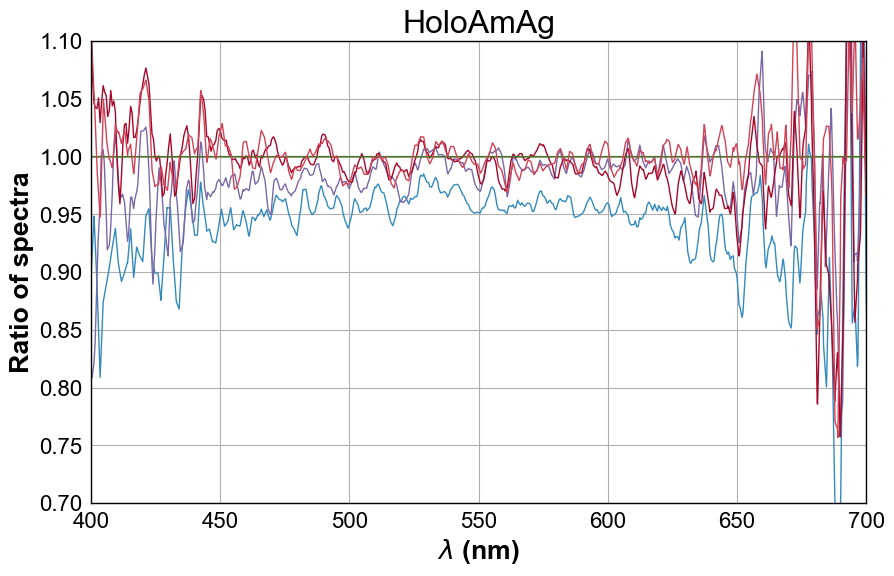

In [72]:
ShowSpectrumRatio(all_wl_HoloAmAg,all_spec_HoloAmAg,bp_HoloAmAg,'HoloAmAg',dir_top_images,'HoloAmAg_ratio.pdf');